# The Loan Approval Prediction problem

VARIABLE DESCRIPTIONS:
* **Loan_ID**	              Unique Loan ID
* **Gender**	              Male/ Female
* **Married**	              Applicant married (Y/N)
* **Dependents**	          Number of dependents
* **Education**	          Applicant Education (Graduate/ Under Graduate)
* **Self_Employed**	      Self employed (Y/N)
* **ApplicantIncome**	      Applicant income
* **CoapplicantIncome**	  Coapplicant income
* **LoanAmount**	          Loan amount in thousands
* **Loan_Amount_Term**	  Term of loan in months
* **Credit_History**	      credit history meets guidelines
* **Property_Area**	      Urban/ Semi Urban/ Rural
* **Loan_Status**	          Loan approved (Y/N)

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

### Color Codes:

* Blue:    "#30a2da",
* Red:    "#fc4f30",
* Yellow:    "#e5ae38",
* Green:    "#6d904f",
* Grey:    "#8b8b8b"

In [8]:
plt.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'seaborn-muted',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'classic',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [9]:
train.describe()

/home/kanishka/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,NaN,NaN,NaN
50%,3812.500000,1188.500000,NaN,NaN,NaN
75%,5795.000000,2297.250000,NaN,NaN,NaN
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [16]:
sum(train["Property_Area"].value_counts())

614

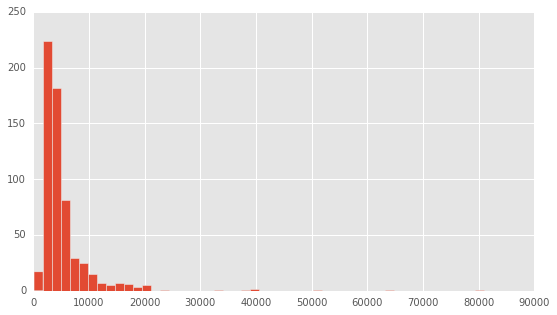

In [133]:
plt.figure(figsize=(8,5))
train["ApplicantIncome"].hist(bins=50)

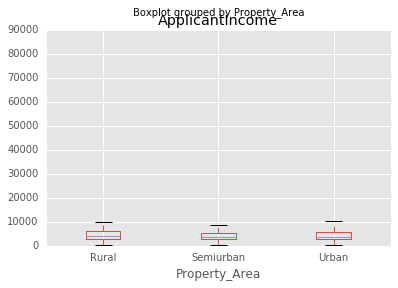

In [51]:
train.boxplot(column="ApplicantIncome", by="Property_Area")

In [4]:
freq1 = train["Credit_History"].value_counts(ascending=True)
freq2 = train.pivot_table(values = "Loan_Status", index=["Credit_History"], aggfunc = lambda x: x.map({"Y":1, "N":0}).mean())
# freq3 = pd.crosstab(train["ApplicantIncome"], train["Loan_Status"])
freq3 = train.pivot_table(values = "Loan_Status", index=["Education"], aggfunc = lambda x: x.map({"Y":1, "N":0}).mean())
freq4 = train["Education"].value_counts(ascending=True)

print "Frequency Table for Credit History:"
print freq1

print  "\nProbability of getting loan for each Credit History category:"
print freq2

print freq4

print freq3

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan for each Credit History category:
Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64
Not Graduate    134
Graduate        480
Name: Education, dtype: int64
Education
Graduate        0.708333
Not Graduate    0.611940
Name: Loan_Status, dtype: float64


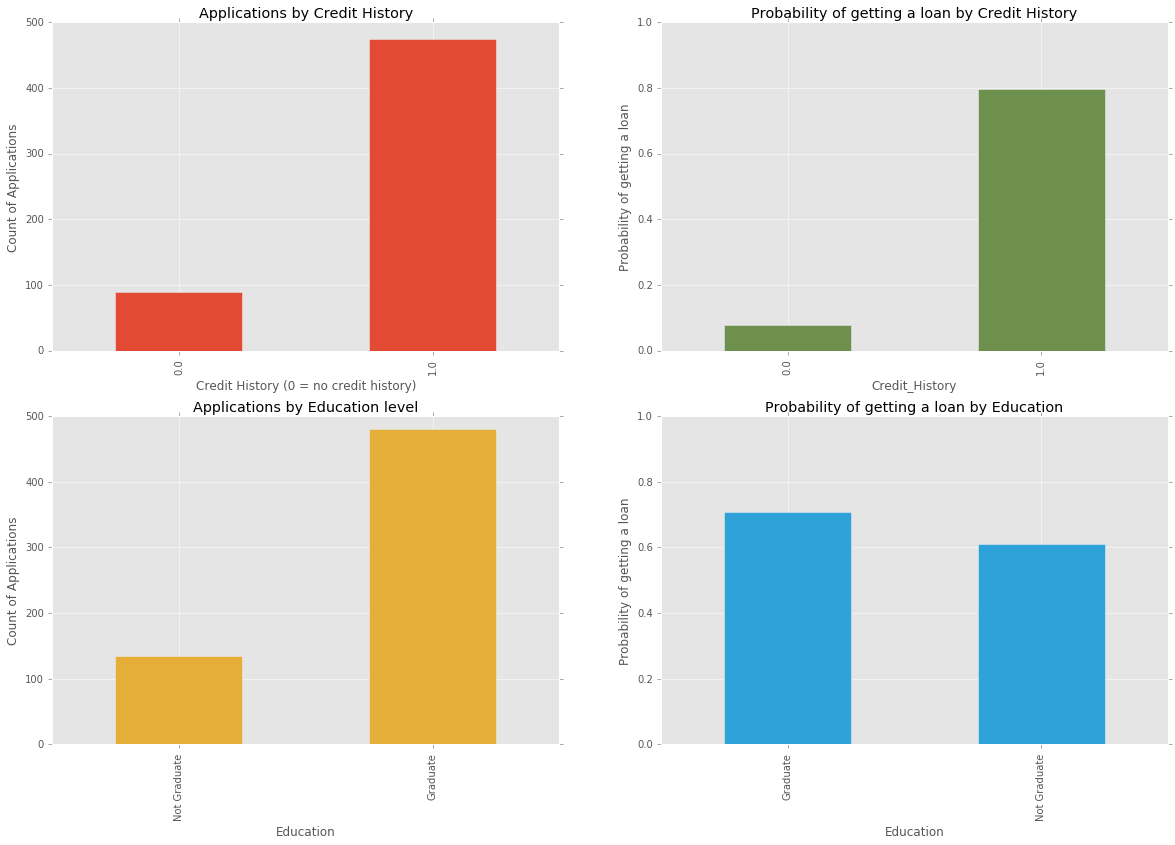

In [11]:
plt.figure(figsize=(20,20))
# ax1 = fig.add_subplot(1,2,1)
ax1 = plt.subplot2grid((3,2), (0,0))
ax1.set_xlabel("Credit History (0 = no credit history)")
ax1.set_ylabel("Count of Applications")
ax1.set_title("Applications by Credit History")
freq1.plot(kind="bar")

# ax2 = fig.add_subplot(1,2,2)
ax2 = plt.subplot2grid((3,2), (0,1))
ax2.set_xlabel("Credit History (0 = no credit history)")
ax2.set_ylabel("Probability of getting a loan")
ax2.set_title("Probability of getting a loan by Credit History")
ax2.set_ylim(0,1)
freq2.plot(kind="bar", color="#6d904f")

# ax2 = fig.add_subplot(2,2,1)
ax3 = plt.subplot2grid((3,2), (1,1))
ax3.set_xlabel("Education")
ax3.set_ylabel("Probability of getting a loan")
ax3.set_title("Probability of getting a loan by Education")
ax3.set_ylim(0,1)
freq3.plot(kind="bar", color="#30a2da")

ax3 = plt.subplot2grid((3,2), (1,0))
ax3.set_xlabel("Education")
ax3.set_ylabel("Count of Applications")
ax3.set_title("Applications by Education level")
# ax3.set_ylim(0,1)
freq4.plot(kind="bar", color="#e5ae38")

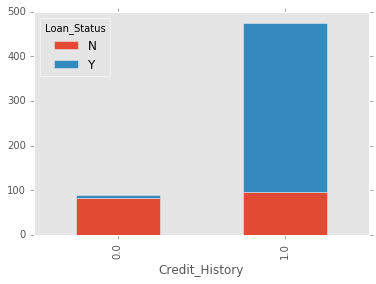

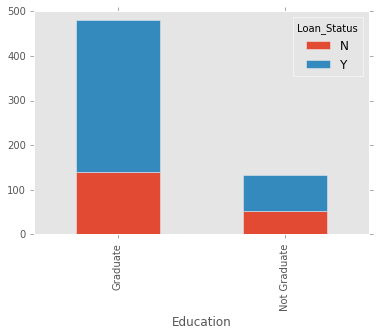

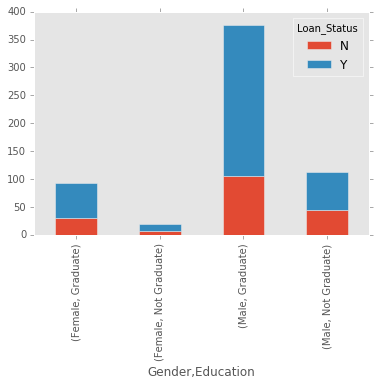

In [12]:
# new_fig = plt.figure(figsize=(20,20))
# new_ax1 = plt.subplot2grid((2,2), (0,0))
# new_ax1.set_xlabel("Credit History")
# new_ax1.set_ylabel("Loan Status")
crosstab1 = pd.crosstab(train["Credit_History"], train["Loan_Status"])
crosstab1.plot(kind="bar", stacked=True, grid=False)

# new_ax2 = plt.subplot2grid((3,2), (0,1))
crosstab2 = pd.crosstab(train["Education"], train["Loan_Status"])
crosstab2.plot(kind="bar", stacked=True, grid=False)

# new_ax3 = plt.subplot2grid((3,2), (1,0))
crosstab3 = pd.crosstab((train["Gender"], train["Education"]), train["Loan_Status"])
crosstab3.plot(kind="bar", stacked=True, grid=False)

## Data Munging

Time to look at the data for missing values(or NaNs).

Missing data often creates a lot of problems and has a great impact on the accuracy of a model's prediction. It would be wise to fill all the missing values with a value which can be done in several different ways.

In [14]:
train.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Now that we know how many variables have what number of missing data, we can think of some ways of filling these vacancies with values that can aid in the model building process. 

Note that having the value of '0' in a  row is not the same as a missing value. Missing values are often shown using 'NaN' which stands for 'Not a Number'

### Ways to fill in missing values:

#### 1. Loan Amount Example:



TypeError: not all arguments converted during string formatting

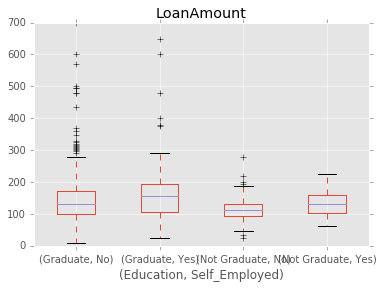

In [17]:
train.boxplot(column="LoanAmount", by=("Education", "Self_Employed"))